In [1]:
import random
import math
from matplotlib import pyplot as plt

In [2]:
file_name = "Prob5b.txt"

def read_file():
    f = open(file_name, "r")
    txt = f.read()
    txt = "".join(i for i in txt if ord(i) < 128)
    f.close()
    return txt

In [3]:
def build_min_heap(A, n):
    for i in range(parent(n), -1, -1): 
        min_heapify(A, i) 

def min_heapify(A, i):    
    l = left(i)
    r = right(i)
    smallest = i

    if l < len(A) and A[l][0] < A[i][0]:
        smallest = l
    else:
        smallest = i
        
    if r < len(A) and A[r][0] < A[smallest][0]:
        smallest = r

    if smallest is not i:
        A[i], A[smallest] = A[smallest], A[i]        
        min_heapify(A, smallest)
        
def extract_min(Q):
    x = Q[0]
    del Q[0]
    return x

def insert(Q, z):
    Q.append(z)
    build_min_heap(Q, len(Q))

def parent(i):
    return int((i / 2)) - 1
        
def left(i):
    return 2 * i + 1

def right(i):
    return (2 * i) + 2

In [4]:
def build_freq_tups(A):
    f = {} 
    for c in A: 
        if (c in f): 
            f[c] += 1
        else: 
            f[c] = 1
            
    characters = f.keys()
    tuples = []
    for c in characters:
        tuples.append((f[c], c))    
    return tuples

def huffman(C):
    Q = C
    while len(Q) > 1:
        left = extract_min(Q)
        right = extract_min(Q)
        freq = left[0] + right[0]
        insert(Q, (freq, (left, right)))
    return Q

def remove_freq(Q):
    p = Q[1]
    if type(p) == type(""):
        return p
    else: 
        return(remove_freq(p[0]), remove_freq(p[1]))

def build_code_dict(node, code = '') :
    if type(node) == type(""):
        codes[node] = code
    else:
        build_code_dict(node[0], code + "0")
        build_code_dict(node[1], code + "1")
        
def encode(text):
    encoded_str = ""
    for c in text:
        encoded_str += codes[c]
        
    f = open(file_name, "a+")
    f.write("\n\n" + encoded_str)
    f.close()
    return encoded_str

[(10028, ((4197, ((1920, ((851, ((390, 'm'), (461, 'l'))), (1069, ((491, ((211, ((101, 'v'), (110, 'q'))), (280, ((137, ','), (143, ((58, ((28, '\n'), (30, ((14, 'I'), (16, 'V'))))), (85, 'b'))))))), (578, ((240, ((113, 'g'), (127, ((55, ((27, 'P'), (28, 'N'))), (72, ((32, ((15, 'C'), (17, 'D'))), (40, 'h'))))))), (338, ((164, 'p'), (174, ((77, 'f'), (97, ((44, ((20, ((8, ((4, 'F'), (4, ((1, ';'), (3, 'U'))))), (12, 'j'))), (24, 'M'))), (53, ((26, ((12, 'A'), (14, 'x'))), (27, ((13, 'S'), (14, ((6, 'E'), (8, 'Q'))))))))))))))))))), (2277, ((935, 'e'), (1342, ((661, 'a'), (681, 's'))))))), (5831, ((2636, ((1151, ((495, 'r'), (656, 't'))), (1485, ' '))), (3195, ((1541, ((751, ((356, 'c'), (395, ((2, 'L'), (393, 'o'))))), (790, 'i'))), (1654, ((761, 'u'), (893, ((402, ((187, '.'), (215, 'd'))), (491, 'n')))))))))))]
{'m': '0000', 'l': '0001', 'v': '001000', 'q': '001001', ',': '001010', '\n': '00101100', 'I': '001011010', 'V': '001011011', 'b': '0010111', 'g': '001100', 'P': '00110100', '

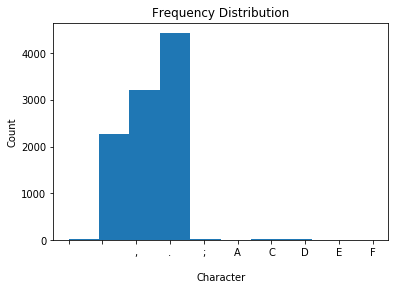

In [5]:
#Read file into an array of chars.
text = read_file()
A = [char for char in text] 

#Print an example histogram.
plt.hist(A)
plt.title('Frequency Distribution')
plt.xlabel('Character')
plt.ylabel('Count')

#Build the frequency table.
F = build_freq_tups(A)

#Create the huffman tree.
Q = huffman(F)
print(Q)

#Build the code dictionary out of the huffman tree.
codes = {}
cleaned_Q = remove_freq(Q[0])
code_dict = build_code_dict(cleaned_Q)
print(codes)

#Encode and compress the origional text.
encoded_text = encode(text)
print(encoded_text)

In [6]:
len([char for char in text])

10028